# Ultralytics

[Ultralytics](https://docs.ultralytics.com/) is a company and open-source community known for developing state-of-the-art machine learning models, particularly for object detection tasks. They are most famous for the YOLO (You Only Look Once) series of models, which are highly efficient and widely used in real-time object detection. Ultralytics focuses on making cutting-edge deep learning technology accessible through easy-to-use Python libraries, tools, and pre-trained models. Their YOLO models, are popular for applications in industries like security, automation, robotics, and can be used for research!

Example of a paper which employed Yolo from ultralytics -->
https://ieeexplore.ieee.org/document/10426304/


## Yolo history, was also made by Ultralytics

* YOLO (You Only Look Once), a popular object detection and image segmentation model, was developed by Joseph Redmon and Ali Farhadi at the University of Washington. Launched in 2015, YOLO quickly gained popularity for its high speed and accuracy.

* * YOLOv2, released in 2016, improved the original model by incorporating batch normalization, anchor boxes, and dimension clusters.
YOLOv3, launched in 2018, further enhanced the model's performance using a more efficient backbone network, multiple anchors and spatial pyramid pooling.
* YOLOv4 was released in 2020, introducing innovations like Mosaic data augmentation, a new anchor-free detection head, and a new loss function.
* YOLOv5 further improved the model's performance and added new features such as hyperparameter optimization, integrated experiment tracking and automatic export to popular export formats.
* YOLOv6 was open-sourced by Meituan in 2022 and is in use in many of the company's autonomous delivery robots.
* YOLOv7 added additional tasks such as pose estimation on the COCO keypoints dataset.
* YOLOv8 released in 2023 by Ultralytics. YOLOv8 introduced new features and improvements for enhanced performance, flexibility, and efficiency, supporting a full range of vision AI tasks,
* YOLOv9 introduces innovative methods like Programmable Gradient Information (PGI) and the Generalized Efficient Layer Aggregation Network (GELAN).
* YOLOv10 is created by researchers from Tsinghua University using the Ultralytics Python package. This version provides real-time object detection advancements by introducing an End-to-End head that eliminates Non-Maximum Suppression (NMS) requirements.
* YOLO11 🚀 NEW: Ultralytics' latest YOLO models delivering state-of-the-art (SOTA) performance across multiple tasks, including detection, segmentation, pose estimation, tracking, and classification, leverage capabilities across diverse AI applications and domains.

In [36]:
! pip install ultralytics

# ! pip install --upgrade google-api-python-client # --> locally 
# ! pip install google-colab # --> locally 

import ultralytics

ultralytics.checks()

Ultralytics 8.3.9  Python-3.10.6 torch-2.4.1+cpu CPU (13th Gen Intel Core(TM) i9-13980HX)
Setup complete  (32 CPUs, 15.6 GB RAM, 818.0/953.0 GB disk)


In [37]:
import ultralytics
path_video = "C:\\Users\\Chiqu\\Documents\\GitHub\\Deep-Learning-and-Computer-Vision-for-Business\\02-Pytorch and CV\\object detection tracking\\Shopping, People, Commerce, Mall, Many, Crowd, Walking   Free Stock video footage   YouTube [WvhYuDvH17I].mp4"

In [38]:
# ## load the video which is in the GitHub repo within 02-Pytorch and CV\object detection tracking in colab files
# # downlaoad the video
# ! wget https://github.com/lorenzo-stacchio/Deep-Learning-and-Computer-Vision-for-Business/raw/refs/heads/main/02-Pytorch%20and%20CV/object%20detection%20tracking/Shopping,%20People,%20Commerce,%20Mall,%20Many,%20Crowd,%20Walking%20%20%20Free%20Stock%20video%20footage%20%20%20YouTube%20%5BWvhYuDvH17I%5D.mp4
# # define the local path
# path_video = "/content/Shopping, People, Commerce, Mall, Many, Crowd, Walking   Free Stock video footage   YouTube [WvhYuDvH17I].mp4"

In [39]:
# define output video path
path_video_out = path_video.replace(".mp4", "_out.avi")

In [40]:
# from ultralytics import YOLO

# # Load an official or custom model
# model = YOLO("yolov8n.pt")  # Load an official Detect model
# # model = YOLO("yolov8n-seg.pt")  # Load an official Segment model
# # model = YOLO("yolov8n-pose.pt")  # Load an official Pose model
# # model = YOLO("path/to/best.pt")  # Load a custom trained model

# # Perform tracking with the model
# # results = model.track("https://youtu.be/LNwODJXcvt4", show=True)  # Tracking with default tracker
# # results = model.track("https://youtu.be/LNwODJXcvt4", show=True, tracker="bytetrack.yaml")  # with ByteTrack
# results = model.track(source = path_video, show=True, tracker="bytetrack.yaml")  # with ByteTrack

In [41]:
## save results in a list of dictionaries!

frame_results = []

In [52]:
from ultralytics import YOLO
import cv2
# from google.colab.patches import cv2_imshow
# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Open the video file
cap = cv2.VideoCapture(path_video)

# Retrieve video properties: width, height, and frames per second
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize video writer to save the output video with the specified properties
out = cv2.VideoWriter(path_video_out, cv2.VideoWriter_fourcc(*"MJPG"), fps, (w, h))

idx = 0
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True, show=True)
                      # save=True,
                      # save_txt=True,
                      # save_conf=True)
        frame_results.append(results)
        # break
        # Visualize the results on the frame
        annotated_frame = results[0].plot()
        
        # print(idx, frame_count//2, idx % (frame_count//2)==0)
        # if idx % (frame_count//2)==0:
          # Display the annotated frame
          # cv2.imshow("", mat=annotated_frame) # if you are in local
          #cv2_imshow(annotated_frame) # if you are in google colab
          # Break the loop if 'q' is pressed
          # if cv2.waitKey(1) & 0xFF == ord("q"):
          # break
          # cv2.destroyAllWindows()

        out.write(annotated_frame)
        

        idx +=1 
        if idx > 50:
            break
        # break
        
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()

# Release the video writer and capture objects, and close all OpenCV windows
out.release()


0: 384x640 13 persons, 1 bird, 102.2ms
Speed: 0.0ms preprocess, 102.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 bird, 158.8ms
Speed: 2.8ms preprocess, 158.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 bird, 121.0ms
Speed: 2.7ms preprocess, 121.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 1 bird, 115.5ms
Speed: 2.6ms preprocess, 115.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 2 birds, 109.8ms
Speed: 3.6ms preprocess, 109.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 1 bird, 119.4ms
Speed: 1.6ms preprocess, 119.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 1 bird, 87.4ms
Speed: 3.4ms preprocess, 87.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 1 bird, 145

In [69]:
# first frame results
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)

import seaborn as sns
 
df = pd.DataFrame(columns = ["frame_id", "object_id", "object_xyxy", "object_xyxyn", "cls"])

for idx_frame, res in enumerate(frame_results):
    # print(len(res))
    # print(res)
    for r in res:
        class_names = r.names
        # print(class_names)
        # visualize all the fields with this 
        # print(r.boxes)
        # print(r.boxes.shape) # --> number of found objects (number_object, predicted_info)
        for idx, box in enumerate(r.boxes): # for each found object
            # print(f"-----------DATA for box {idx}-------------")
            # id
            object_id = box.id.item()  # Tracking ID
            object_cls = box.cls.item()  # Class ID
            object_cls_name = class_names[object_cls]  # Class name
            object_xyxy = box.xyxy.tolist()  # Bounding box coordinates
            object_xyxyn = box.xyxyn.tolist()  # Normalized bounding box coordinates

            # Append the new row with all extracted information
            new_row = {
                "frame_id": idx_frame,
                "object_id": object_id,
                "object_xyxy": object_xyxy,
                "object_xyxyn": object_xyxyn,
                "cls": object_cls_name  # Store class name or class ID as needed
            }
            
            # Append the row to the dataframe
            df = df._append(new_row, ignore_index=True)
        
    #     break
    # break

C:\Users\Chiqu\AppData\Local\Temp\ipykernel_9996\3127069059.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(new_row, ignore_index=True)


In [54]:
df

,frame_id,object_id,object_xyxy,object_xyxyn,cls
0,0,1.0,"[[974.2109375, 313.44287109375, 1029.076171875...","[[0.7611023187637329, 0.4353373348712921, 0.80...",person
1,0,2.0,"[[442.88067626953125, 431.87158203125, 496.501...","[[0.3460005223751068, 0.5998216271400452, 0.38...",person
2,0,3.0,"[[964.218017578125, 212.16006469726562, 1010.6...","[[0.7532953023910522, 0.29466676712036133, 0.7...",person
3,0,4.0,"[[173.18255615234375, 291.029296875, 217.19921...","[[0.13529887795448303, 0.40420734882354736, 0....",person
4,0,5.0,"[[759.3290405273438, 632.946044921875, 829.370...","[[0.5932258367538452, 0.879091739654541, 0.647...",person
...,...,...,...,...,...
1091,52,20.0,"[[383.8130798339844, 245.035400390625, 433.594...","[[0.29985398054122925, 0.3403269350528717, 0.3...",person
1092,52,22.0,"[[1163.0361328125, 160.86306762695312, 1211.89...","[[0.9086219668388367, 0.22342093288898468, 0.9...",person
1093,52,23.0,"[[660.3370971679688, 118.78880310058594, 700.8...","[[0.5158883333206177, 0.16498444974422455, 0.5...",person
1094,52,24.0,"[[570.3675537109375, 39.916343688964844, 598.6...","[[0.44559964537620544, 0.05543936789035797, 0....",person


In [55]:
df["frame_id"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], dtype=object)

## Analytics

What to do with this data?

Exercise:


1.   Analyze frame results and find which variable could be interest of your analysis 💡;
2.   Think on some kind of useful analysis that we can do 💡;
3: Implement it 💻



Example of interesting analysis:

* People Counting;
* Spatial Areas of Interests;
* People trajectory analysis;

### People Counting (easy)

In [56]:
people = df[df["cls"]=="person"]["object_id"].unique()
print(len(people))

24


## Spatial Areas of Interests

In [57]:
df['object_xyxy']

0       [[974.2109375, 313.44287109375, 1029.076171875...
1       [[442.88067626953125, 431.87158203125, 496.501...
2       [[964.218017578125, 212.16006469726562, 1010.6...
3       [[173.18255615234375, 291.029296875, 217.19921...
4       [[759.3290405273438, 632.946044921875, 829.370...
                              ...                        
1091    [[383.8130798339844, 245.035400390625, 433.594...
1092    [[1163.0361328125, 160.86306762695312, 1211.89...
1093    [[660.3370971679688, 118.78880310058594, 700.8...
1094    [[570.3675537109375, 39.916343688964844, 598.6...
1095    [[705.251220703125, 640.5103149414062, 751.762...
Name: object_xyxy, Length: 1096, dtype: object

In [71]:
# Extract the center of each bounding box 
df['center_x'] = df['object_xyxy'].apply(lambda xyxy: (xyxy[0][0] + xyxy[0][2]) / 2)
df['center_y'] = df['object_xyxy'].apply(lambda xyxy: (xyxy[0][1] + xyxy[0][3]) / 2)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 37.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

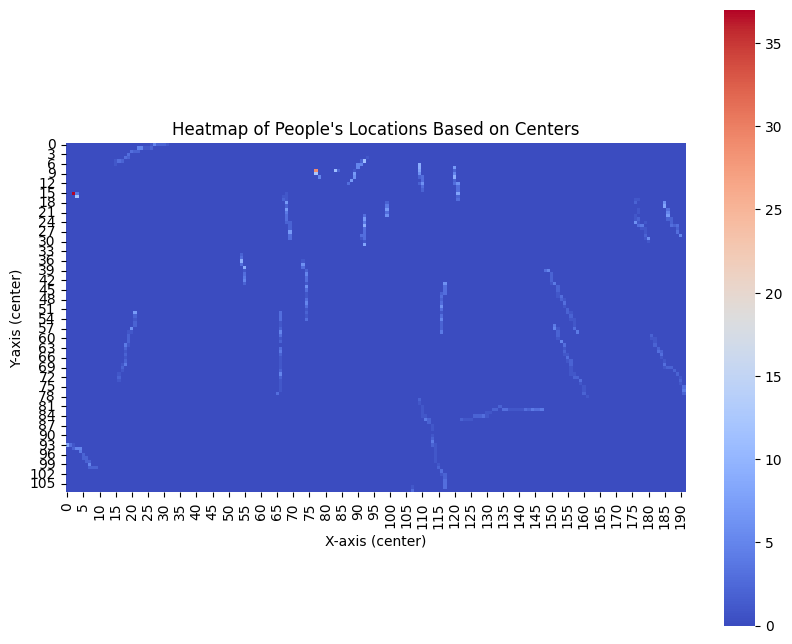

In [73]:
resize_factor = 10
# Create a heatmap based on the people's locations (center_x, center_y)
# let's calculate a scaled version of the image (coarse)
shape_image = np.array([1920,1080]) // resize_factor
plt.figure(figsize=(10, 8))
heatmap_data, xedges, yedges = np.histogram2d(df['center_x'], df['center_y'] , bins=tuple(shape_image))
print(heatmap_data)

sns.heatmap(heatmap_data.T, cmap='coolwarm', square=True, cbar=True)
plt.title("Heatmap of People's Locations Based on Centers")
plt.xlabel("X-axis (center)")
plt.ylabel("Y-axis (center)")

# Display the heatmap
plt.show()

[[ 0. 53.  0.  0.  0.  0.  0.  0. 30. 19.]
 [16.  0.  0.  0.  0. 16. 17.  0.  0.  0.]
 [31.  0.  0.  0.  9. 11.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  1.  0.  0.  0.  0.  0.]
 [ 0. 24. 29.  0.  6. 24. 19.  4.  0.  0.]
 [46.  0.  0. 23. 27.  3.  0.  0.  0.  0.]
 [35. 12.  0.  0.  0.  0.  0.  0.  0.  0.]
 [19. 14. 56.  0.  0.  0.  0.  0.  0.  0.]
 [36. 17.  0.  0.  0.  0.  0.  8.  0.  4.]
 [22.  7.  0.  0. 38. 15.  0.  6. 17. 22.]
 [ 0. 24.  0.  0.  0.  0.  0. 16.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 18.  0.  0.]
 [ 0.  0.  0. 15.  2.  5.  0. 19.  0.  0.]
 [ 0.  0.  0.  0. 25. 32. 23.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  5. 33.  0.  0.  3.  0.  0.  0.  0.]
 [ 0. 19. 34.  0.  0. 11. 23.  7.  0.  0.]]


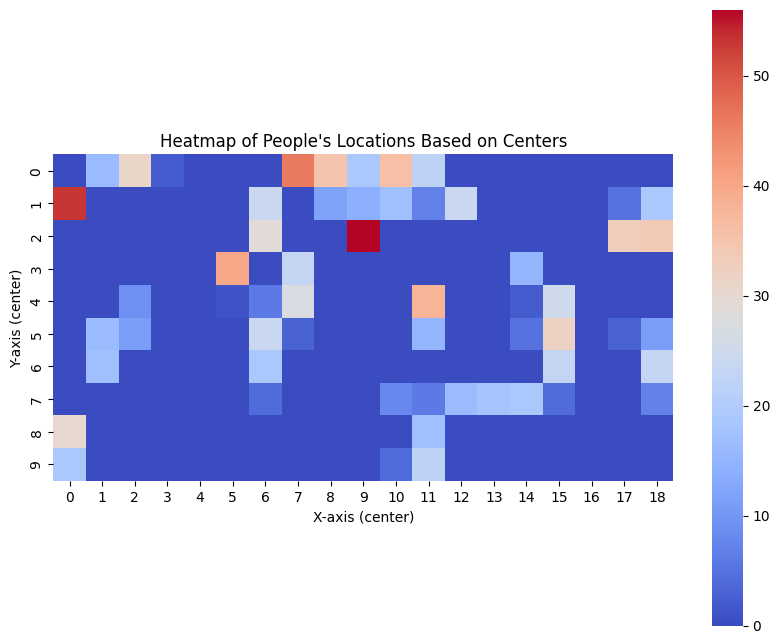

In [74]:
# Create a heatmap based on the people's locations (center_x, center_y)
# let's calculate a scaled version of the image (coarse)
shape_image = np.array([1920,1080]) // 100
plt.figure(figsize=(10, 8))
heatmap_data, xedges, yedges = np.histogram2d(df['center_x'], df['center_y'] , bins=tuple(shape_image))
print(heatmap_data)

sns.heatmap(heatmap_data.T, cmap='coolwarm', square=True, cbar=True)
plt.title("Heatmap of People's Locations Based on Centers")
plt.xlabel("X-axis (center)")
plt.ylabel("Y-axis (center)")

# Display the heatmap
plt.show()

## People Trajectory Analysis

In [59]:
people = df[df["cls"]=="person"]["object_id"].unique()
print(len(people))

24
